In [1]:
import pandas as pd
MyData=pd.read_csv("C:/Users/Admin/Desktop/insurance.csv")

In [2]:
MyData.shape

(1338, 7)

In [3]:
MyData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
print(MyData.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder objects
sex_encoder = LabelEncoder()
smoker_encoder = LabelEncoder()
region_encoder = LabelEncoder()
# Fit and transform the 'sex' column
sex_encoded = sex_encoder.fit_transform(MyData['sex'])
# Replace the original 'sex' column with the encoded values
MyData['sex'] = sex_encoded
# Fit and transform the 'smoker' column
smoker_encoded = smoker_encoder.fit_transform(MyData['smoker'])
# Replace the original 'smoker' column with the encoded values
MyData['smoker'] = smoker_encoded
# Fit and transform the 'region' column
region_encoded = region_encoder.fit_transform(MyData['region'])
# Replace the original 'region' column with the encoded values
MyData['region'] = region_encoded
print(MyData.head())

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520


In [6]:
print(MyData.dtypes)

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object


In [7]:
MyData.isnull().sum() 

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
duplicate_rows_count = MyData.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows_count)


Number of Duplicate Rows: 1


In [9]:
MyData.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
import numpy as np
MyData = pd.concat([MyData, MyData.iloc[0:5]], ignore_index=True)
# New rows to be added
new_rows = {
    'age': [None, None, None],
    'sex': [np.nan, np.nan, np.nan],
    'bmi': [np.nan, np.nan, np.nan],
    'children': [np.nan, np.nan, np.nan],
    'smoker': [np.nan, np.nan, np.nan],
    'region': [np.nan, np.nan, np.nan],
    'charges' : [np.nan, np.nan, np.nan]
}
# Convert to DataFrame
new_df = pd.DataFrame(new_rows)
# Append new rows to the DataFrame
MyData = pd.concat([MyData, new_df], ignore_index=True)
# Display the DataFrame
print(MyData)

       age  sex     bmi  children  smoker  region      charges
0       19  0.0  27.900       0.0     1.0     3.0  16884.92400
1       18  1.0  33.770       1.0     0.0     2.0   1725.55230
2       28  1.0  33.000       3.0     0.0     2.0   4449.46200
3       33  1.0  22.705       0.0     0.0     1.0  21984.47061
4       32  1.0  28.880       0.0     0.0     1.0   3866.85520
...    ...  ...     ...       ...     ...     ...          ...
1341    33  1.0  22.705       0.0     0.0     1.0  21984.47061
1342    32  1.0  28.880       0.0     0.0     1.0   3866.85520
1343  None  NaN     NaN       NaN     NaN     NaN          NaN
1344  None  NaN     NaN       NaN     NaN     NaN          NaN
1345  None  NaN     NaN       NaN     NaN     NaN          NaN

[1346 rows x 7 columns]


In [11]:
MyData.isnull().sum()

age         3
sex         3
bmi         3
children    3
smoker      3
region      3
charges     3
dtype: int64

In [12]:
# Check for duplicate rows
duplicate_rows_count = MyData.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows_count)


Number of Duplicate Rows: 8


In [13]:
MyData.fillna(MyData.mean(), inplace=True)
MyData.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
# Remove duplicate rows
MyData.drop_duplicates(inplace=True)
# Check for duplicate rows
duplicate_rows_count = MyData.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows_count)


Number of Duplicate Rows: 0


In [15]:
MyData.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
MyData.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.222091,0.504863,30.663448,1.095735,0.204936,1.516081,13279.105279
std,14.039080,0.499976,6.098187,1.205120,0.403655,1.104795,12105.829893
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4746.521225
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9388.753650
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


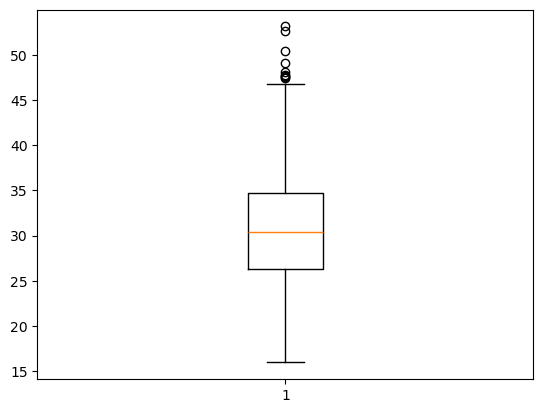

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(MyData['bmi'])
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14896\1681551156.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_LL = int(Q1 - 1.5*IQR)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14896\1681551156.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  IQR_UL = int(Q3 + 1.5*IQR)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14896\1681551156.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  MyData.loc[MyData['bmi']>IQR_UL , 'bmi'] = int(Bmi_col_df.quantile(q=0.90))
C:\Users\Admin\AppData\Local\Temp\ipykernel_14896\1681551156.py:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  MyData.loc[MyData['bmi']<IQR_LL , 'b

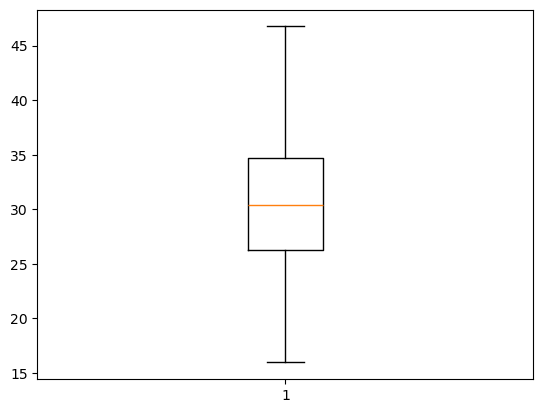

In [18]:
Bmi_col_df = pd.DataFrame(MyData['bmi'])
Bmi_median = Bmi_col_df.median()
#getting IQR of Age column
Q3 = Bmi_col_df.quantile(q=0.75)
Q1 = Bmi_col_df.quantile(q=0.25)
IQR = Q3-Q1
#Deriving boundaries of Outliers
IQR_LL = int(Q1 - 1.5*IQR)
IQR_UL = int(Q3 + 1.5*IQR)
#Finding and treating outliers - both lower and upper end
MyData.loc[MyData['bmi']>IQR_UL , 'bmi'] = int(Bmi_col_df.quantile(q=0.90))
MyData.loc[MyData['bmi']<IQR_LL , 'bmi'] = int(Bmi_col_df.quantile(q=0.01))

#checking boxplot for Bmi column
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(MyData['bmi'])
plt.show()

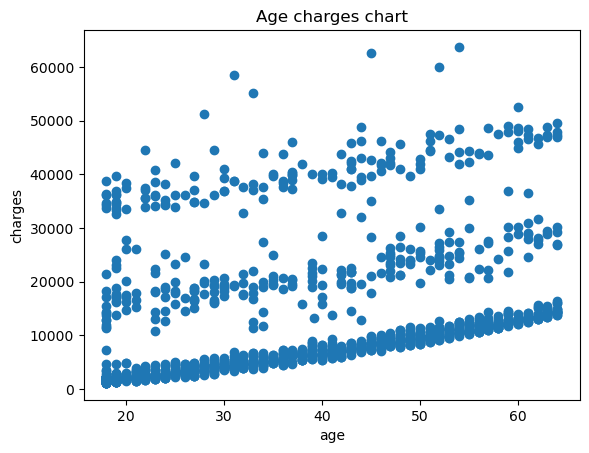

In [19]:
#Check how Expense is varying with Age
x = MyData["age"]
y=  MyData["charges"]
plt.scatter(x, y)
plt.title('Age charges chart')
plt.xlabel('age')
plt.ylabel('charges')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14896\3302562412.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MyData['age'])  #to see the distribution
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

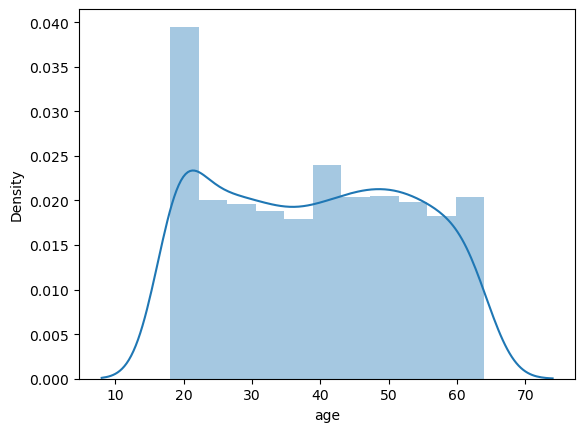

In [20]:
import seaborn as sns
sns.distplot(MyData['age'])  #to see the distribution

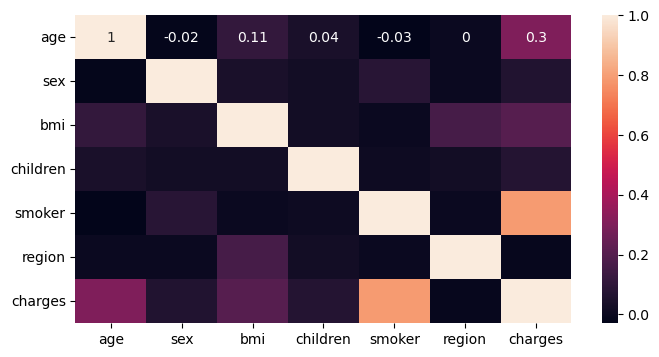

In [21]:
correlation_matrix= MyData.corr().round(2)
fgr, ax = plt.subplots(figsize =(8, 4))
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True)
fgr.savefig("myimage.png")

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(MyData)
scaled_data
#converting data back to pandas dataframe
MyData_scaled = pd.DataFrame(scaled_data)
MyData_scaled.columns = MyData.columns
#Separating features and response
features = ["age","sex","bmi","children","smoker","region"]
response = ["charges"]
x=MyData_scaled[features]
y=MyData_scaled[response]

In [23]:
#Dividing data in test and train
#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
#Fitting lineaar regression model
model = LinearRegression()
model.fit(x_train, y_train)
#Checking accuracy on test data
accuracy = model.score(x_test,y_test)
print(accuracy*100,'%')

81.64475927000137 %


In [24]:
import numpy as np
y_pred = model.predict(x_test)
print('R2_score : ',metrics.r2_score(y_pred,y_test))
print('MSE : ',metrics.mean_squared_error(y_pred,y_test))

R2_score :  0.7113940188847531
MSE :  0.008469905265576817


In [25]:
y_test

,charges
578,0.137316
610,0.086988
569,0.711591
1034,0.175145
198,0.136035
...,...
787,0.065248
823,0.181995
1,0.009636
589,0.171122


In [26]:
y_pred

array([[ 1.57199963e-01],
       [ 1.31580743e-01],
       [ 5.88628230e-01],
       [ 1.45116067e-01],
       [ 9.38154203e-02],
       [ 4.42752195e-01],
       [ 8.18700683e-03],
       [ 1.63061726e-01],
       [ 4.31475705e-02],
       [ 5.63636372e-01],
       [ 3.84122175e-02],
       [ 5.11956334e-02],
       [ 1.86133806e-01],
       [ 4.69580641e-02],
       [ 1.53702144e-01],
       [ 5.88642738e-02],
       [ 2.39019026e-01],
       [ 8.12809002e-02],
       [ 9.42470167e-02],
       [ 2.84723527e-02],
       [ 1.12102205e-01],
       [ 2.10972848e-01],
       [ 7.22142309e-02],
       [ 1.39626318e-01],
       [ 1.68547959e-01],
       [ 1.30014090e-01],
       [ 6.98876556e-02],
       [ 1.44988106e-01],
       [ 4.61140644e-02],
       [ 1.50689949e-01],
       [ 1.29020456e-01],
       [ 1.13340905e-01],
       [ 4.16353241e-02],
       [ 1.96619426e-01],
       [-1.34556367e-03],
       [ 3.60010737e-01],
       [ 5.97731143e-01],
       [ 4.66534331e-01],
       [ 5.9

In [27]:
print(model.intercept_ ) #checking the intercept of model equation

[-0.04418446]


In [28]:
print(model.coef_)   #Checking the coefficients of model equation

[[ 0.18575651  0.00095366  0.15572355  0.04302032  0.37489368 -0.01749184]]
